多目标规划模型

线性加权法
求出加权组合后的目标函数得到一个单目标规划问题，利用linprog()函数进行求解

敏感性分析
从定量分析的角度研究有关因素发生某种变化对某一个或一组关键指标影响程度的一种不确定分析技术，其实质是通过逐一改变相关变量数值的方法来解释关键指标受这些因素变动影响大小的规律

In [34]:
import numpy as np
from scipy.optimize import linprog
import matplotlib.pyplot as plt
from matplotlib import rcParams

#两个目标函数的权重以及对应x1，x2的值
weights = [
    (0.4, 0.6),
    (0.5, 0.5),
    (0.3, 0.7)
]
#定义约束条件
A = np.array([[-1, -1]])
# A = [[-1,-1]]
b = np.array([-7])
lb = np.array([0,0])  #下界
ub = np.array([5,6])  #上界
bounds = [(lb[0], ub[0]), (lb[1], ub[1])]
for w1, w2 in weights:
    #构造目标函数系数
    c = [w1/30*2+w2/2*0.4, w1/30*5+w2/2*0.3]
    result = linprog(c, A_ub=A, b_ub=b, bounds=bounds, method='highs')
    x = result.x
    fval = result.fun   #w1*f1/30 + w2*f2/2
    f1 = 2*x[0]+5*x[1]
    f2 = 0.4*x[0]+0.3*x[1]
    #打印结果
    print(f'\n权重组合为：w1={w1}, w2={w2}')
    print(f'最优解：x1={x[0]:.2f}, x2={x[1]:.2f}')
    print(f'目标函数值：f1={f1:.2f}, f2={f2:.2f}, 综合指标={fval:.2f}')


权重组合为：w1=0.4, w2=0.6
最优解：x1=5.00, x2=2.00
目标函数值：f1=20.00, f2=2.60, 综合指标=1.05

权重组合为：w1=0.5, w2=0.5
最优解：x1=5.00, x2=2.00
目标函数值：f1=20.00, f2=2.60, 综合指标=0.98

权重组合为：w1=0.3, w2=0.7
最优解：x1=1.00, x2=6.00
目标函数值：f1=32.00, f2=2.20, 综合指标=1.09


敏感性分析

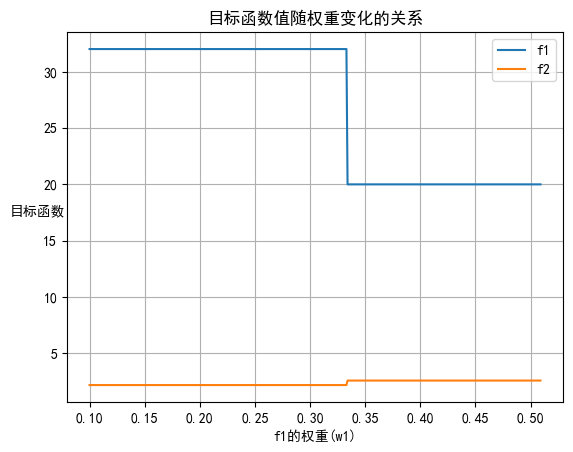

In [35]:
# ============敏感性分析============
#权重范围
W1 = np.arange(0.1,0.51,0.001)
W2 = 1-W1
#权重值的个数
n = len(W1)
#初始化结果存储数据
F1 = np.zeros(n)
F2 = np.zeros(n)
X1 = np.zeros(n)
X2 = np.zeros(n)
Fval = np.zeros(n)
#遍历不同的权重，执行敏感性分析
for i in range(n):
    w1 = W1[i]
    w2 = W2[i]
    c = [w1/30*2+w2/2*0.4, w1/30*5+w2/2*0.3]
    #求解线性规划
    res = linprog(c, A_ub=A, b_ub=b, bounds=bounds, method='highs')
    x = res.x
    F1[i] = 2*x[0]+5*x[1]
    F2[i] = 0.4*x[0]+0.3*x[1]
    X1[i] = x[0]
    X2[i] = x[1]
    Fval[i] = res.fun

#绘图
rcParams['font.sans-serif'] = ['SimHei']  #黑体
rcParams['axes.unicode_minus'] = False  #解决符号显示问题
#图一
plt.figure()
plt.plot(W1,F1, label='f1')
plt.plot(W1,F2, label='f2')
plt.xlabel('f1的权重(w1)')
plt.ylabel('目标函数', rotation=0)
plt.legend()  #显示图例
plt.title('目标函数值随权重变化的关系')
plt.grid()
plt.show()

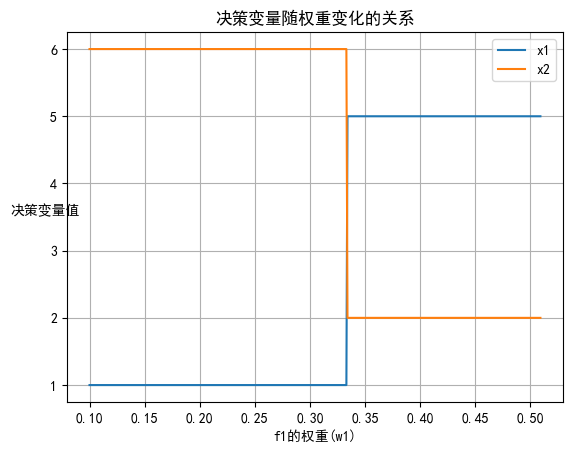

In [36]:
#图二
plt.figure()
plt.plot(W1,X1, label='x1')
plt.plot(W1,X2, label='x2')
plt.xlabel('f1的权重(w1)')
plt.ylabel('决策变量值', rotation=0)
plt.legend()  #显示图例
plt.title('决策变量随权重变化的关系')
plt.grid()
plt.show()

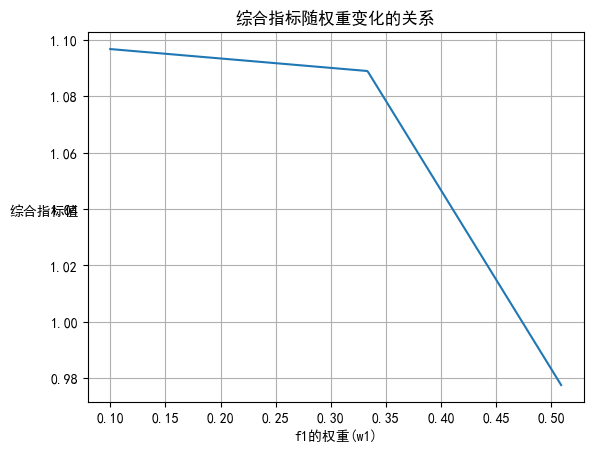

In [37]:
#图三
plt.figure()
plt.plot(W1,Fval)
plt.xlabel('f1的权重(w1)')
plt.ylabel('综合指标值', rotation=0)
# plt.legend()  #显示图例
plt.title('综合指标随权重变化的关系')
plt.grid()
plt.show()